In [1]:
import numpy as np
import math as m
import seaborn as sns

sns.set(color_codes=True)
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

In [2]:
def t_solver (q1, q2, u1, u2):
    return (np.roots([u2, u1+2*q2, 2*q1-u2, -u1]))

In [3]:
N = 100000
mu = 0.0
sigma = 1.0
parameter = 1e-5

In [4]:
# Normal distribution

Ux = np.random.normal(mu, sigma, N)
Uy = np.random.normal(mu, sigma, N)
Qx = np.random.normal(mu, sigma, N)
Qy = np.random.normal(mu, sigma, N)

In [5]:
# Test_1 - D denominator solver

errors = 0

for i in xrange(0, N):
    
    t1, t2, t3 = t_solver(Qx[i], Qy[i], Ux[i], Uy[i])
    
    if (t1 * t2 * t3 < Ux[i] / Uy[i] - parameter 
        and t1 * t2 * t3 > Ux[i] / Uy[i] + parameter):
        errors += 1
    if (t1*t2+t2*t3+t3*t1 < (2*Qx[i] - 1)/Uy[i] - parameter 
        and t1*t2+t2*t3+t3*t1 > (2*Qx[i] - 1)/Uy[i] + parameter):
        errors += 1
    if (t1+t2+t3 < -(Ux[i]+2*Qy[i])/Uy[i] - parameter
        and t1+t2+t3 > (Ux[i]+2*Qy[i])/Uy[i] + parameter):
        errors += 1
        
print errors

0


In [6]:
def N_func (t, q1, q2, u1, u2):
    return q2*t*t*t+(q1-2*u2)*t*t-(q2+2*u1)*t-q1

In [7]:
def B_func (t1, t2, t3, q1, q2, u1, u2):
    
    t = [t1, t2, t3]
    B = np.zeros(3)
    
    B[0] = N_func(t[0], q1, q2, u1, u2)/((t[0]-t[1])*(t[0] - t[2]))
    B[1] = N_func(t[1], q1, q2, u1, u2)/((t[1]-t[2])*(t[1] - t[0]))                                    
    B[2] = N_func(t[2], q1, q2, u1, u2)/((t[2]-t[1])*(t[2] - t[0]))    
    
    return B

In [8]:
def nu_func (t1, t2, t3, q1, q2, u1, u2):
    
    t = [t1, t2, t3]
    nu = np.zeros(3)
    
    nu[0] = B_func(t1, t2, t3, q1, q2, u1, u2)[0]/(1+t[0]*t[0])
    nu[1] = B_func(t1, t2, t3, q1, q2, u1, u2)[1]/(1+t[1]*t[1])
    nu[2] = B_func(t1, t2, t3, q1, q2, u1, u2)[2]/(1+t[2]*t[2])
    
    return nu

In [9]:
def det_func (q1, q2, u1, u2):
    
    return q1*u2 - q2*u1

In [10]:
# Points_1 - normal points test

saddles, beaks, comets = 0, 0, 0
norm = 0.0

for i in xrange(0, N):
    
    root1, root2, root3 = t_solver(Qx[i], Qy[i], Ux[i], Uy[i])
    
    if det_func(Qx[i], Qy[i], Ux[i], Uy[i]) < 0:
        saddles += 1
    elif (-parameter < np.imag(root1) < parameter and 
          -parameter < np.imag(root2) < parameter and 
          -parameter < np.imag(root3) < parameter):
        beaks += 1
    else:
        comets += 1
    norm += 1.0
    
print saddles/norm, beaks/norm, comets/norm

0.49744 0.12059 0.38197


In [11]:
# Points_2 - weighted points test

saddles, beaks, comets = 0, 0, 0
norm = 0.0

for i in xrange(0, N):
    
    root1, root2, root3 = t_solver(Qx[i], Qy[i], Ux[i], Uy[i])
    
    if det_func(Qx[i], Qy[i], Ux[i], Uy[i]) < 0:
        saddles += m.fabs(det_func(Qx[i], Qy[i], Ux[i], Uy[i]))
    elif (-parameter < np.imag(root1) < parameter and 
          -parameter < np.imag(root2) < parameter and 
          -parameter < np.imag(root3) < parameter):
        beaks += m.fabs(det_func(Qx[i], Qy[i], Ux[i], Uy[i]))
    else:
        comets += m.fabs(det_func(Qx[i], Qy[i], Ux[i], Uy[i]))
    norm += m.fabs(det_func(Qx[i], Qy[i], Ux[i], Uy[i]))
        
print saddles/norm, beaks/norm, comets/norm

0.49890304268 0.0534491242139 0.447647833107


In [12]:
# 3 points for plot

Ux_plot = np.random.normal(mu, sigma, 100)
Uy_plot = np.random.normal(mu, sigma, 100)
Qx_plot = np.random.normal(mu, sigma, 100)
Qy_plot = np.random.normal(mu, sigma, 100)

saddle_flag, beak_flag, comet_flag = 0, 0, 0
saddle = np.zeros(4)
beak = np.zeros(4)
comet = np.zeros(4)

for i in xrange(0, N):
    
    root1, root2, root3 = t_solver(Qx_plot[i], Qy_plot[i], Ux_plot[i], Uy_plot[i])
    
    if det_func(Qx_plot[i], Qy_plot[i], Ux_plot[i], Uy_plot[i]) < 0 and saddle_flag != 1:
        saddle_flag = 1
        saddle = [Qx_plot[i], Qy_plot[i], Ux_plot[i], Uy_plot[i]]
    elif (-parameter < np.imag(root1) < parameter and 
          -parameter < np.imag(root2) < parameter and 
          -parameter < np.imag(root3) < parameter and
          beak_flag != 1):
        beak_flag = 1
        beak = [Qx_plot[i], Qy_plot[i], Ux_plot[i], Uy_plot[i]]
    elif comet_flag != 1:
        comet_flag = 1
        comet = [Qx_plot[i], Qy_plot[i], Ux_plot[i], Uy_plot[i]]
    if saddle_flag == 1 and beak_flag == 1 and comet_flag == 1:
        break

In [13]:
h = 0.3

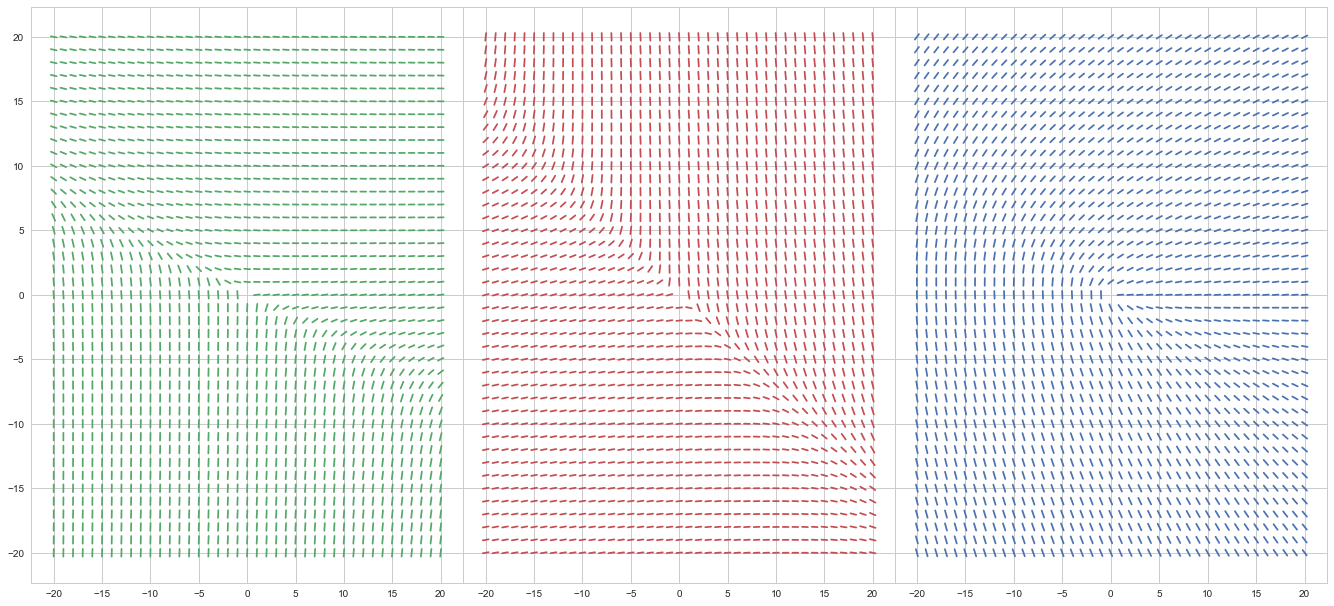

In [14]:
# 3 points plot

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
f.subplots_adjust(left=0.0, right=1.0, top=1.0,
                    bottom=0.0, wspace=0.0, hspace=0.0)

for i in xrange(-20, 21):
    for j in xrange(-20, 21):
        
        q1, q2, u1, u2 = saddle
        
        q = q1*i + q2*j
        u = u1*i + u2*j
        
        phi = 0.5 * arctan(u / q)
        phi_normal = 0.0
                    
        if (q >= 0) and (u >= 0):
            phi_normal = phi
        elif (q <= 0) and (u >= 0):
            phi_normal = phi + pi / 2
        elif (q >= 0) and (u <= 0):
            phi_normal = phi
        elif (q <= 0) and (u <= 0):
            phi_normal = phi - pi / 2
            
        ax1.plot([i-h*cos(phi_normal), i+h*cos(phi_normal)], [j-h*sin(phi_normal), j+h*sin(phi_normal)], 'g')
        
for i in xrange(-20, 21):
    for j in xrange(-20, 21):
        
        q1, q2, u1, u2 = beak
        
        q = q1*i + q2*j
        u = u1*i + u2*j
        
        phi = 0.5 * arctan(u / q)
        phi_normal = 0.0
                    
        if (q >= 0) and (u >= 0):
            phi_normal = phi
        elif (q <= 0) and (u >= 0):
            phi_normal = phi + pi / 2
        elif (q >= 0) and (u <= 0):
            phi_normal = phi
        elif (q <= 0) and (u <= 0):
            phi_normal = phi - pi / 2
        
        ax2.plot([i-h*cos(phi_normal), i+h*cos(phi_normal)], [j-h*sin(phi_normal), j+h*sin(phi_normal)], 'r')

for i in xrange(-20, 21):
    for j in xrange(-20, 21):
        
        q1, q2, u1, u2 = comet
        
        q = q1*i + q2*j
        u = u1*i + u2*j
        
        phi = 0.5 * arctan(u / q)
        phi_normal = 0.0
                    
        if (q >= 0) and (u >= 0):
            phi_normal = phi
        elif (q <= 0) and (u >= 0):
            phi_normal = phi + pi / 2
        elif (q >= 0) and (u <= 0):
            phi_normal = phi
        elif (q <= 0) and (u <= 0):
            phi_normal = phi - pi / 2
        
        ax3.plot([i-h*cos(phi_normal), i+h*cos(phi_normal)], [j-h*sin(phi_normal), j+h*sin(phi_normal)], 'b')

plt.show()